In [1]:
import sympy as sp

""" This module contains functions for working with metrics in different coordinate systems. """

def getMetric(lineElement, coordSystem="Cartesian", subs=None, overrideConst = False): #the override lets the code run faster if you know for sure your line element will work out
    if coordSystem not in ["Cartesian", "PlanePolar", "SphericalPolar", "CylindricalPolar"]:
        raise ValueError("Unknown coordinate system")

    lineElement=sp.expand(lineElement)
    coords = (t, x, y, z)

    dim = len(coords)
    g = sp.zeros(dim)

    for mu in range(dim):
        for nu in range(dim):
            coeff = lineElement.coeff(sp.diff(coords[mu]) * sp.diff(coords[nu]))
            if mu != nu and coeff != 0:
                g[mu, nu] = coeff.subs(subs) / 2
            else:
                g[mu, nu] = coeff.subs(subs)

    # Check for unexpected terms in the line element
    if not overrideConst:
        reconstructed_line_element = sum(g[i, j] * sp.diff(coords[i]) * sp.diff(coords[j]) for i in range(dim) for j in range(dim))
        if sp.simplify(lineElement.subs(subs) - reconstructed_line_element) != 0:
            raise ValueError("Line element contains terms that are not pure differentials of the coordinates used")
    return g

In [2]:
""" Intial setup for Alcubeirre metric in Cartesian coordinates """

vs, sigma, R, lam = sp.symbols('v_s sigma R lambda')
t = sp.Function('t')(lam)
x = sp.Function('x')(lam)
y = sp.Function('y')(lam)
z = sp.Function('z')(lam)

dt=sp.diff(t)
dx=sp.diff(x)
dy=sp.diff(y)
dz=sp.diff(z)

# for now, define constants as symbols
xs, r, f_r, c = sp.symbols("x_s r f_r c")

lineElement = -c**2*dt**2 + (dx - vs*f_r*dt)**2 + dy**2 + dz**2
display(lineElement)

# order of substitutions matter!!!
subs= [
    (f_r, (sp.tanh(sigma * (r + R)) - sp.tanh(sigma * (r - R))) / (2 * sp.tanh(sigma * R))),
    (r, sp.sqrt((x - xs)**2 + y**2 + z**2)),
    (xs, vs*t), # since its steady state
]

metric=getMetric(lineElement, "Cartesian", subs, True)
metric

-c**2*Derivative(t(lambda), lambda)**2 + (-f_r*v_s*Derivative(t(lambda), lambda) + Derivative(x(lambda), lambda))**2 + Derivative(y(lambda), lambda)**2 + Derivative(z(lambda), lambda)**2

Matrix([
[-c**2 + v_s**2*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))**2/(4*tanh(R*sigma)**2), -v_s*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(2*tanh(R*sigma)), 0, 0],
[                -v_s*(-tanh(sigma*(-R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))) + tanh(sigma*(R + sqrt((-v_s*t(lambda) + x(lambda))**2 + y(lambda)**2 + z(lambda)**2))))/(2*tanh(R*sigma)),                                                                                                                                                                                                        1, 0, 0],
[                                                                                                                                      

In [3]:
""" Computing Christoffel symbols """

import numpy as np
from itertools import product

metric_inv = metric.inv()
print("start computation")
n=4
X = [t, x, y, z]
# computing the symbols using the metric equation
# Create array to store the computed christoffel symbols.
christoffel_symbols = np.zeros(shape=n, dtype='object')
simple = False
for i in range(n):
    dummy_matrix = sp.Matrix.zeros(n,n)
    for (j,k,l) in product(range(n), repeat=3):
        dummy_matrix[j,k] += (
            sp.Rational(1/2)*metric_inv[i,l] * (sp.diff(metric[l,j],X[k])
            +sp.diff(metric[l,k],X[j]) - sp.diff(metric[j,k],X[l]))
        )
        print(f"done connection j: {j} k: {k} l: {l}")
    christoffel_symbols[i] = sp.simplify(dummy_matrix) if simple else dummy_matrix

start computation
done connection j: 0 k: 0 l: 0
done connection j: 0 k: 0 l: 1
done connection j: 0 k: 0 l: 2
done connection j: 0 k: 0 l: 3
done connection j: 0 k: 1 l: 0
done connection j: 0 k: 1 l: 1
done connection j: 0 k: 1 l: 2
done connection j: 0 k: 1 l: 3
done connection j: 0 k: 2 l: 0
done connection j: 0 k: 2 l: 1
done connection j: 0 k: 2 l: 2
done connection j: 0 k: 2 l: 3
done connection j: 0 k: 3 l: 0
done connection j: 0 k: 3 l: 1
done connection j: 0 k: 3 l: 2
done connection j: 0 k: 3 l: 3
done connection j: 1 k: 0 l: 0
done connection j: 1 k: 0 l: 1
done connection j: 1 k: 0 l: 2
done connection j: 1 k: 0 l: 3
done connection j: 1 k: 1 l: 0
done connection j: 1 k: 1 l: 1
done connection j: 1 k: 1 l: 2
done connection j: 1 k: 1 l: 3
done connection j: 1 k: 2 l: 0
done connection j: 1 k: 2 l: 1
done connection j: 1 k: 2 l: 2
done connection j: 1 k: 2 l: 3
done connection j: 1 k: 3 l: 0
done connection j: 1 k: 3 l: 1
done connection j: 1 k: 3 l: 2
done connection j: 1 

In [6]:
""" Displaying the Christoffel symbols """

# for i in range(n):
#     display(christoffel_symbols[i])

C = christoffel_symbols

In [7]:

""" Define momentum vector in terms of lambda """

pt = sp.diff(t, lam)
px = sp.diff(x, lam)
py = sp.diff(y, lam)
pz = sp.diff(y, lam)

dt = sp.diff(t)
dx = sp.diff(x)
dy = sp.diff(y)
dz = sp.diff(z)

""" Compute change in momentum vector with respect to lambda """

Ct, Cx, Cy, Cz = C[0], C[1], C[2], C[3]
dptdl = -1 * (Ct[0,0] * pt**2 + Ct[1,1] * px**2 + Ct[2,2] * py**2 + Ct[3,3] * pz**2 + 2 * (Ct[0,1] * pt * px + Ct[0,2] * pt * py + Ct[0,3] * pt * pz + Ct[1,2] * px * py + Ct[1,3] * px * pz + Ct[2,3] * py * pz))
dpxdl = -1 * (Cx[0,0] * pt**2 + Cx[1,1] * px**2 + Cx[2,2] * py**2 + Cx[3,3] * pz**2 + 2 * (Cx[0,1] * pt * px + Cx[0,2] * pt * py + Cx[0,3] * pt * pz + Cx[1,2] * px * py + Cx[1,3] * px * pz + Cx[2,3] * py * pz))
dpydl = -1 * (Cy[0,0] * pt**2 + Cy[1,1] * px**2 + Cy[2,2] * py**2 + Cy[3,3] * pz**2 + 2 * (Cy[0,1] * pt * px + Cy[0,2] * pt * py + Cy[0,3] * pt * pz + Cy[1,2] * px * py + Cy[1,3] * px * pz + Cy[2,3] * py * pz))
dpzdl = -1 * (Cz[0,0] * pt**2 + Cz[1,1] * px**2 + Cz[2,2] * py**2 + Cz[3,3] * pz**2 + 2 * (Cz[0,1] * pt * px + Cz[0,2] * pt * py + Cz[0,3] * pt * pz + Cz[1,2] * px * py + Cz[1,3] * px * pz + Cz[2,3] * py * pz))


In [8]:
""" Lambdify functions """

# for change in mommentum

dptdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, vs,R,sigma,c), dptdl, "numpy")
dpxdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, vs,R,sigma,c), dpxdl, "numpy")
dpydl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, vs,R,sigma,c), dpydl, "numpy")
dpzdl_lambda = sp.lambdify((t, x, y, z, dt, dx, dy, dz, vs,R,sigma,c), dpzdl, "numpy")

# for intial null momentum

Bquad=2*(metric[0, 1]*px+metric[0, 2]*py+metric[0, 3]*pz)
Cquad=metric[1, 1]*px**2+metric[2, 2]*py**2+metric[3, 3]*pz**2+2*(
      metric[1, 2]*px*py+metric[1, 3]*px*pz+metric[2, 3]*py*pz
)


pt1 = (-Bquad+sp.sqrt(Bquad**2-4*metric[0,0]*Cquad))/(2*metric[0,0])
pt2 = ((-Bquad - sp.sqrt(Bquad**2 - 4 * metric[0, 0] * Cquad)) / (2 * metric[0, 0]))


pt1_lambda = sp.lambdify((t,x,y,z,vs,R,sigma,c,px,py,pz), pt1, "numpy")
pt2_lambda = sp.lambdify((t,x,y,z,vs,R,sigma,c,px,py,pz), pt2, "numpy")

In [11]:
""" setup intial conditions"""

dL = 0.1
iterations = 1000
vs_val = 1
R_val = 1
sigma_val = 1
c_val = 1

# if you want to use the same initial conditions as the paper
angles_len = 100
angles = np.linspace(0, 2 * np.pi, angles_len)

# if you want to use random initial conditions
number_of_rays = 100

values = np.zeros((number_of_rays, 8))
values[:,0] = 0
values[:, 1] = 1
values[:, 2] = 0
values[:, 3] = 0
# values[:, 4] = 1
values[:, 5] = 1
values[:, 6] = 0
values[:, 7] = 0

args = (values[:, 0], values[:, 1], values[:, 2], values[:, 3], vs_val , R_val, sigma_val, c_val, values[:, 5], values[:, 6], values[:, 7])
values[:, 4] = pt1_lambda(*args) # pt2_lambda(*args)


In [14]:
""" Solve by steps """
import time

geods = []
L = 0

print("start computation ... \n")
start = time.time()

for i in range(iterations):
    L += dL

    args = (
        values[:, 0], values[:, 1], values[:, 2],
        values[:, 3], values[:, 4], values[:, 5],
        values[:, 6], values[:, 7],
        vs_val, R_val, sigma_val, c_val
    )

    dp = np.array([
                    dptdl_lambda(*args),
                    dpzdl_lambda(*args),
                    dpxdl_lambda(*args),
                    dpydl_lambda(*args),
    ]).T


    values[:, 4:] += dp * dL
    values[:,:4] += values[:,4:] * dL
    geods.append(np.copy(values))
    print("Percentage done: {:3.5f} %".format((i/iterations)*100), end="\r")

print("Elapsed time: {:3.2f} seconds".format(time.time()-start))
geods = np.array(geods)
print(geods.shape)


start computation ... 

 ercentage done: 99.90000 %
 Elapsed time:  4.368290185928345
(1000, 100, 8)


Plotting


In [16]:
import plotly.graph_objects as go
import numpy as np

geods_transposed = geods.transpose(1, 0, 2)

fig = go.Figure()
count = 0

angles_length=1

for geod_angle in geods_transposed:
  positions = geod_angle[:, 0:4]
  velocities = geod_angle[:, 4:]

  ts, xs, ys, zs = zip(*positions)
  tps, xps, yps, zps =  zip(*velocities)

  # Plot for velocity
  fig.add_trace(go.Scatter3d(x=ts, y=xs, z=ys, mode='lines'))

  # Add initial velocity vector
  fig.add_trace(go.Cone(x=[ts[0]], y=[xs[0]], z=[ys[0]],
              u=[tps[0]], v=[xps[0]], w=[yps[0]],
              sizemode="scaled",
              sizeref=0.2,
              anchor="tail"))
  count += 1
  print("plotting, currently: {}%".format(str((count/angles_length)*100)), end="\r")

fig.update_layout(scene = dict(
          xaxis_title='Time (t)',
          yaxis_title="X Position (x')",
          zaxis_title="Y Position (y')"),
          width=700,
          margin=dict(r=20, b=10, l=10, t=10))

fig.show()


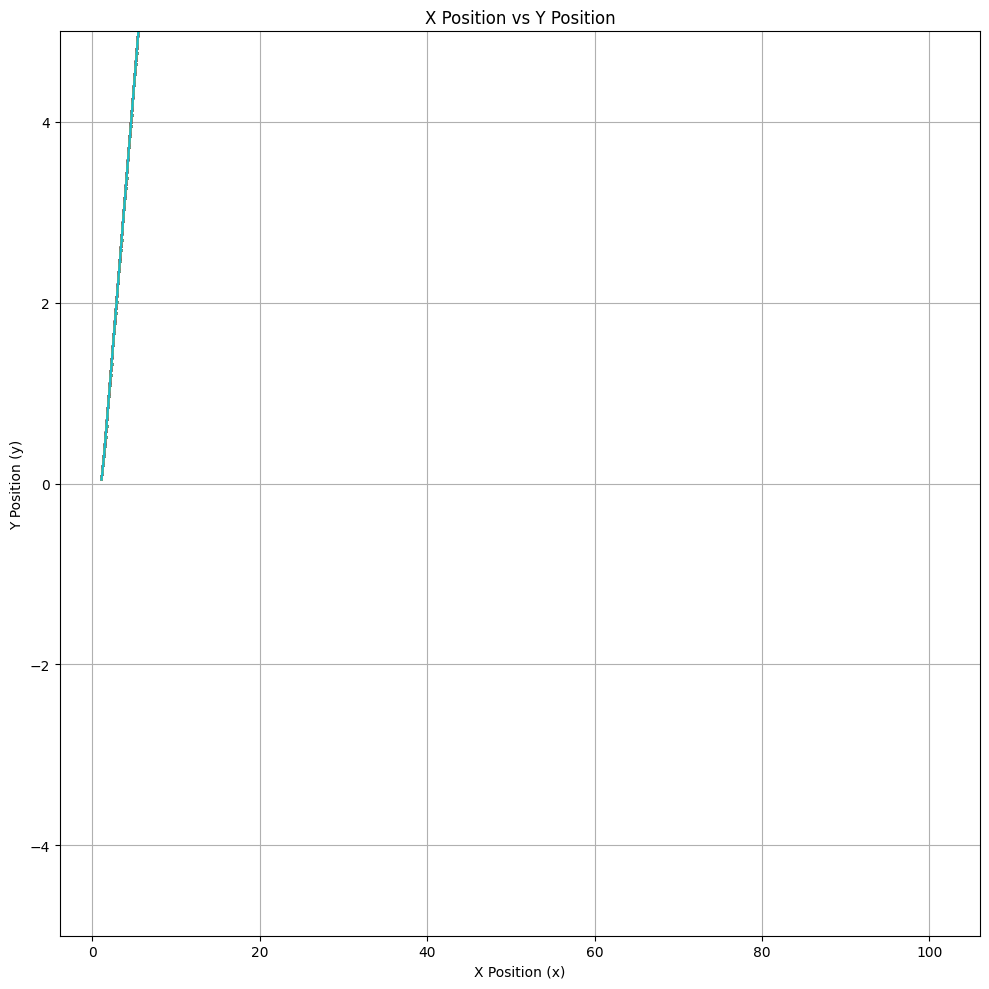

In [22]:
""" for 2d plots """

import matplotlib.pyplot as plt

geods_transposed = geods.transpose(1, 0, 2)

# Creating 2D plots for t-x, t-y, and x-y
fig, ax3 = plt.subplots(1, 1, figsize=(10, 10))  # 1 row, 3 columns

# gamma = 1/(np.sqrt(1-vs_val**2))

# def x_transform(x_val, t_val):
#     return gamma * (x_val - vs_val * t_val)

for geod_angle in geods_transposed:

    positions = geod_angle[:, 0:4]
    velocities = geod_angle[:, 0:4]
    # positions[:,1] = x_transform(positions[:,1], positions[:,0])

    ts, xs, ys, zs = zip(*positions)

    tps, xps, yps, zps =  zip(*velocities)

    # ax1.plot(ts, xs, '.-', linewidth=0.5)  # '.' is the style: line with dots
    # ax1.set_xlabel('Time (t)')
    # ax1.set_ylabel('X Position (x)')
    # ax1.set_title('Time vs X Position')
    # ax1.grid(True)

    # # t-y plot
    # ax2.plot(ts, ys, '.-', linewidth=0.5)  # '.' is the style: line with dots
    # ax2.set_xlabel('Time (t)')
    # ax2.set_ylabel('Y Position (y)')
    # ax2.set_title('Time vs Y Position')
    # ax2.grid(True)

    # x-y plot
    ax3.plot(xs, ys, '.-', markersize=1.0)  # '.' is the style: line with dots
    ax3.set_xlabel('X Position (x)')
    ax3.set_ylabel('Y Position (y)')
    ax3.set_title('X Position vs Y Position')
    ax3.grid(True)
    # ax3.set_xlim([-,0])
    ax3.set_ylim([-5,5])

# Draw a circl
# circle = plt.Circle((0, 0), R_val*(1+vs_val), color='red', alpha=0.5)
# ax3.add_artist(circle)

plt.tight_layout()
plt.show()
